Importing all the required Libraries

In [51]:
import os
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Knowing the working directory

In [2]:
os.getcwd()

'C:\\Users\\Harish'

Changing the working directory

In [2]:
os.chdir("C:\\Users\Harish\Desktop\Projects")

In [3]:
os.getcwd()

'C:\\Users\\Harish\\Desktop\\Projects'

Importing the data

In [4]:
eadata = pd.read_excel("Absenteeism_at_work_Project.xls")

Understanding the summary of the data

In [5]:
eadata.shape

(740, 21)

In [211]:
eadata.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


Changing the variable names to the simple names

In [6]:
eadata.columns = ["id", "reason","month","day","season","texpense",
                  "distance","service","age","work_avg","hit_target",
                  "disp_fail","education","son","drinker","smoker","pet",
                  "weight","height","bmi","absent_time"]

Knowing the data types of the data

In [7]:
eadata.dtypes

id               int64
reason         float64
month          float64
day              int64
season           int64
texpense       float64
distance       float64
service        float64
age            float64
work_avg       float64
hit_target     float64
disp_fail      float64
education      float64
son            float64
drinker        float64
smoker         float64
pet            float64
weight         float64
height         float64
bmi            float64
absent_time    float64
dtype: object

Converting the required variables to the categorical type

In [8]:
categoricalVar = ["reason","month","day","season","disp_fail","education","son","drinker","smoker","pet"]
for var in categoricalVar:
    eadata[var] = eadata[var].astype("category")

Knowing for any missing values in the data

In [9]:
Missing_val = pd.DataFrame(eadata.isnull().sum())
print(Missing_val)

              0
id            0
reason        3
month         1
day           0
season        0
texpense      7
distance      3
service       3
age           3
work_avg     10
hit_target    6
disp_fail     6
education    10
son           6
drinker       3
smoker        4
pet           2
weight        1
height       14
bmi          31
absent_time  22


There are missing values in our data, Imputing the missing values using their mean

In [11]:
imputer = Imputer(missing_values='NaN',strategy='mean',axis=0)  
imputer = imputer.fit(eadata[eadata.columns])
eadata[eadata.columns]= imputer.transform(eadata[eadata.columns])

Checking for completeness of data

In [12]:
Missing_val = pd.DataFrame(eadata.isnull().sum())
print(Missing_val)

             0
id           0
reason       0
month        0
day          0
season       0
texpense     0
distance     0
service      0
age          0
work_avg     0
hit_target   0
disp_fail    0
education    0
son          0
drinker      0
smoker       0
pet          0
weight       0
height       0
bmi          0
absent_time  0


In [13]:
eadata.head(10)

,id,reason,month,day,season,texpense,distance,service,age,work_avg,...,disp_fail,education,son,drinker,smoker,pet,weight,height,bmi,absent_time
0,11.0,26.0,7.0,3.0,1.0,289.000000,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.000000
1,36.0,0.0,7.0,3.0,1.0,118.000000,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.000000
2,3.0,23.0,7.0,4.0,1.0,179.000000,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.000000
3,7.0,7.0,7.0,5.0,1.0,279.000000,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.000000
4,11.0,23.0,7.0,5.0,1.0,289.000000,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.000000
5,3.0,23.0,7.0,6.0,1.0,179.000000,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,6.977716
6,10.0,22.0,7.0,6.0,1.0,221.035471,52.0,3.0,28.0,239554.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.000000
7,20.0,23.0,7.0,6.0,1.0,260.000000,50.0,11.0,36.0,239554.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.000000
8,14.0,19.0,7.0,2.0,1.0,155.000000,12.0,14.0,34.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.000000
9,1.0,22.0,7.0,2.0,1.0,235.000000,11.0,14.0,37.0,239554.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.000000


Data Exploration and Visualization

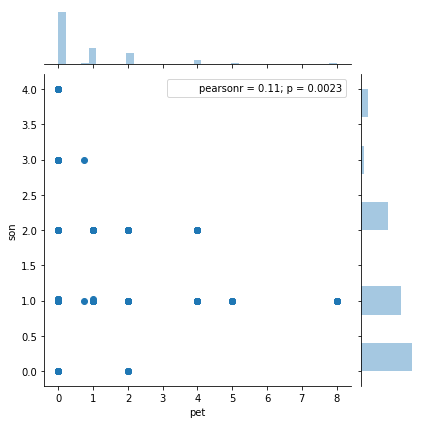

In [140]:
sn.jointplot(x='pet',y='son',data=eadata)

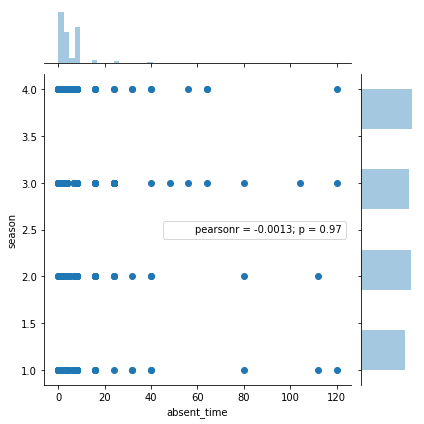

In [18]:
sn.jointplot(x='absent_time',y='season',data=eadata)

From the above plot, it seems all seasons have around same absentees, but more in 2 and 4

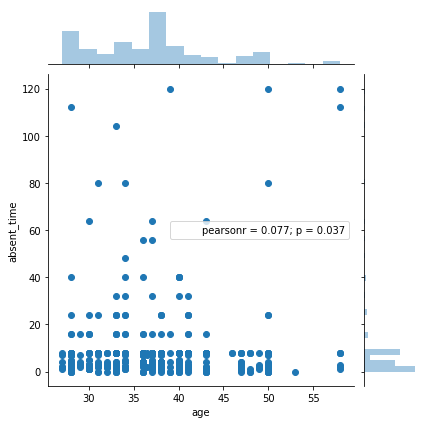

In [19]:
sn.jointplot(x='age',y='absent_time',data=eadata)

This graph shows, that hours of absence have some correlation with age of worker

Middle Aged people tend to have more absent time

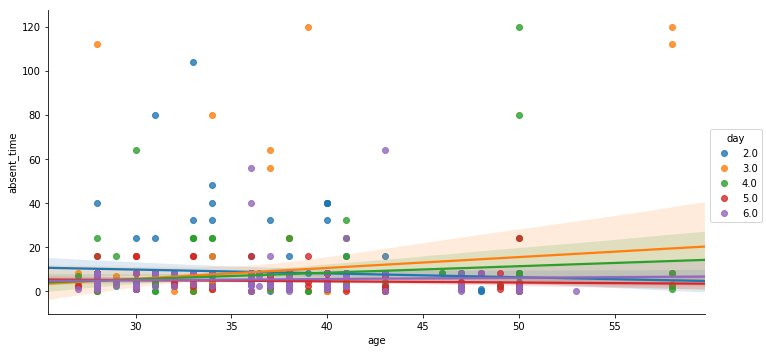

In [20]:
plt.figure(figsize=(12,6))
sn.lmplot(x='age',y='absent_time',data=eadata,hue='day',size=5,aspect=2)

Most of the time, absence is present in 6th day of the week, so, there are some correlation with not only age , but with day of the week as well

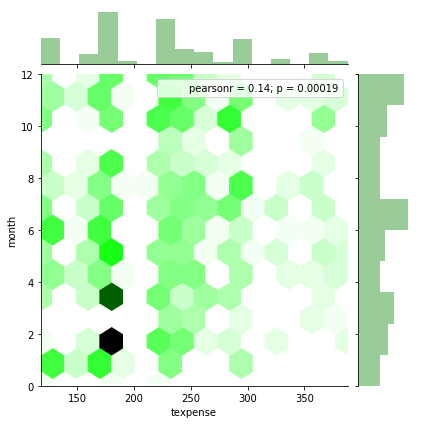

In [21]:
sn.jointplot(x='texpense',y='month',data=eadata,kind='hex',color='green')

Also here, we can see that transportation expence is bigger in winter months than in other seasons

In [22]:
eadata['son'].value_counts()

0.000000    295
1.000000    228
2.000000    155
4.000000     41
3.000000     15
1.017711      6
Name: son, dtype: int64

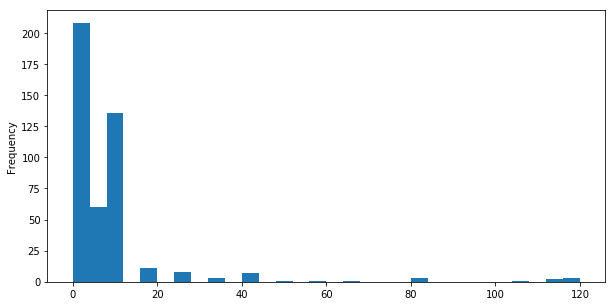

In [23]:
plt.figure(figsize=(10,5))
eadata[eadata['son']!=0]['absent_time'].plot.hist(bins=30)

In the group of people with children, absence in hours tends to be between 0 and 20, and very small amount was absence more than that

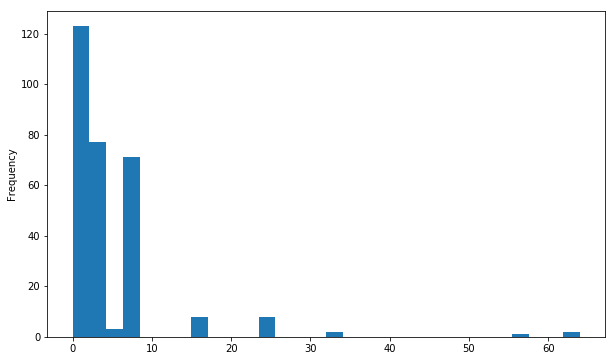

In [24]:
plt.figure(figsize=(10,6))
eadata[eadata['son']==0]['absent_time'].plot.hist(bins=30)

This graph show number of people without any children, so we can see, that top time is around 60 hours, which is less, than those people with children.

So People without any children are having more absent hours

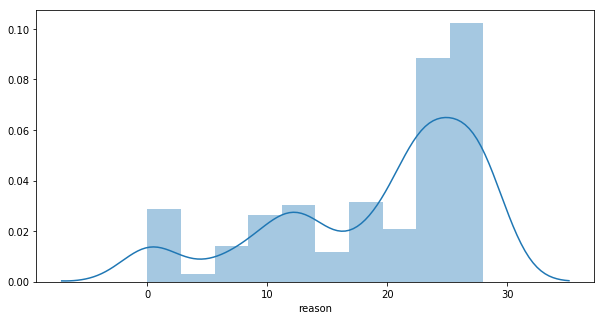

In [26]:
plt.figure(figsize=(10,5))
sn.distplot(eadata['reason'])

Reason 23 and 27 is according to Attributes is physiotherapy (27). So some amount of people are suffering from workload

So from the Analysis it seems each attribute is contributing to employee absence

Selecting the variables that are contributing much to target variable

In [14]:
meadata = eadata.loc[0:, ["id", "reason","month","day","season",
                                   "texpense","distance","service","age",
                                   "work_avg","hit_target","disp_fail",
                                   "education","bmi","absent_time"]]

In [15]:
meadata.shape

(740, 15)

In [16]:
meadata.head(10)

,id,reason,month,day,season,texpense,distance,service,age,work_avg,hit_target,disp_fail,education,bmi,absent_time
0,11.0,26.0,7.0,3.0,1.0,289.000000,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,30.0,4.000000
1,36.0,0.0,7.0,3.0,1.0,118.000000,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,31.0,0.000000
2,3.0,23.0,7.0,4.0,1.0,179.000000,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,31.0,2.000000
3,7.0,7.0,7.0,5.0,1.0,279.000000,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,24.0,4.000000
4,11.0,23.0,7.0,5.0,1.0,289.000000,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,30.0,2.000000
5,3.0,23.0,7.0,6.0,1.0,179.000000,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,31.0,6.977716
6,10.0,22.0,7.0,6.0,1.0,221.035471,52.0,3.0,28.0,239554.0,97.0,0.0,1.0,27.0,8.000000
7,20.0,23.0,7.0,6.0,1.0,260.000000,50.0,11.0,36.0,239554.0,97.0,0.0,1.0,23.0,4.000000
8,14.0,19.0,7.0,2.0,1.0,155.000000,12.0,14.0,34.0,239554.0,97.0,0.0,1.0,25.0,40.000000
9,1.0,22.0,7.0,2.0,1.0,235.000000,11.0,14.0,37.0,239554.0,97.0,0.0,3.0,29.0,8.000000


Plotting Correaltion Matrix to check any Correlation among variables

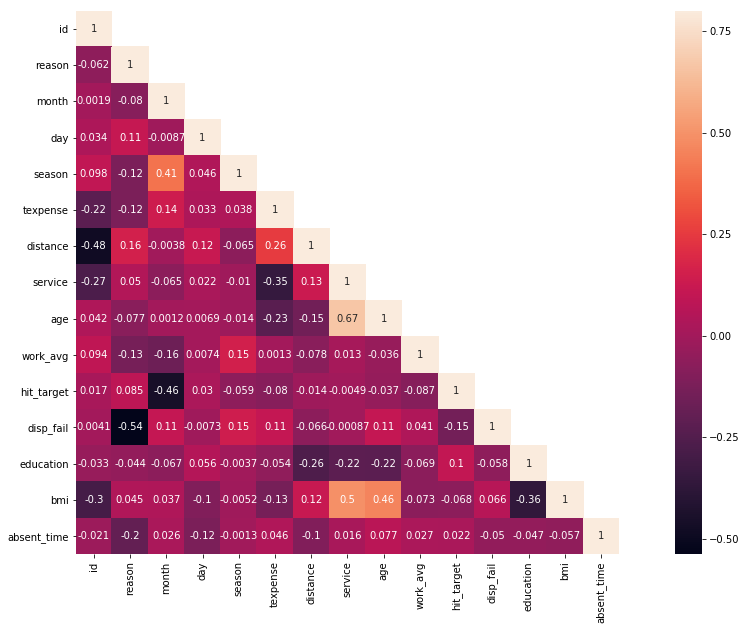

In [252]:
corrMatt = meadata.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

From the plot it is clear that there isno much correlation among variables

In [17]:
meadata.dtypes

id             float64
reason         float64
month          float64
day            float64
season         float64
texpense       float64
distance       float64
service        float64
age            float64
work_avg       float64
hit_target     float64
disp_fail      float64
education      float64
bmi            float64
absent_time    float64
dtype: object

Changing the Data type of target variable since we are dealing with classification

In [18]:
meadata['absent_time'] = meadata['absent_time'].astype(int)

In [19]:
meadata.head(10)

,id,reason,month,day,season,texpense,distance,service,age,work_avg,hit_target,disp_fail,education,bmi,absent_time
0,11.0,26.0,7.0,3.0,1.0,289.000000,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,30.0,4
1,36.0,0.0,7.0,3.0,1.0,118.000000,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,31.0,0
2,3.0,23.0,7.0,4.0,1.0,179.000000,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,31.0,2
3,7.0,7.0,7.0,5.0,1.0,279.000000,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,24.0,4
4,11.0,23.0,7.0,5.0,1.0,289.000000,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,30.0,2
5,3.0,23.0,7.0,6.0,1.0,179.000000,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,31.0,6
6,10.0,22.0,7.0,6.0,1.0,221.035471,52.0,3.0,28.0,239554.0,97.0,0.0,1.0,27.0,8
7,20.0,23.0,7.0,6.0,1.0,260.000000,50.0,11.0,36.0,239554.0,97.0,0.0,1.0,23.0,4
8,14.0,19.0,7.0,2.0,1.0,155.000000,12.0,14.0,34.0,239554.0,97.0,0.0,1.0,25.0,40
9,1.0,22.0,7.0,2.0,1.0,235.000000,11.0,14.0,37.0,239554.0,97.0,0.0,3.0,29.0,8


In [20]:
meadata.dtypes

id             float64
reason         float64
month          float64
day            float64
season         float64
texpense       float64
distance       float64
service        float64
age            float64
work_avg       float64
hit_target     float64
disp_fail      float64
education      float64
bmi            float64
absent_time      int32
dtype: object

Scaling the data for feeding to the Model

In [21]:
scaler = StandardScaler()

In [22]:
scaler.fit(meadata.drop('absent_time',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
scaled_features = scaler.transform(meadata.drop('absent_time',axis=1))

Dividing Train and Test Data Sets

In [33]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,meadata['absent_time'],test_size=0.30)

Building the model with K =2

In [34]:
knn = KNeighborsClassifier(n_neighbors=2)

In [35]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [36]:
pred = knn.predict(X_test)

Evaluating the model

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(confusion_matrix(y_test,pred))

[[13  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 14  6  5  1  0  0  3  0  0  0  0  0  0  0]
 [ 0 13 20  6  1  1  1  4  0  0  0  0  0  0  0]
 [ 0  7 13  4  3  0  1  2  0  0  0  0  0  0  0]
 [ 0  3  7  1  6  0  0  1  0  1  0  0  0  0  0]
 [ 0  0  1  0  1  0  0  2  0  0  0  0  0  0  0]
 [ 2  0  1  0  1  0  0  2  0  0  1  0  0  0  0]
 [ 0 15 14  9  4  0  3 14  1  0  0  0  0  0  0]
 [ 0  1  1  1  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]]


In [52]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.86      0.92      0.89        13
          1       0.45      0.34      0.39        29
          2       0.38      0.48      0.42        46
          3       0.37      0.37      0.37        30
          4       0.33      0.21      0.26        19
          5       0.00      0.00      0.00         4
          6       0.00      0.00      0.00         7
          8       0.56      0.80      0.66        60
         16       0.00      0.00      0.00         4
         24       0.00      0.00      0.00         3
         32       0.00      0.00      0.00         1
         40       0.00      0.00      0.00         2
         56       0.00      0.00      0.00         1
         64       0.00      0.00      0.00         2
        120       0.00      0.00      0.00         1

avg / total       0.42      0.48      0.44       222



Knowing the Optimal K value

In [40]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

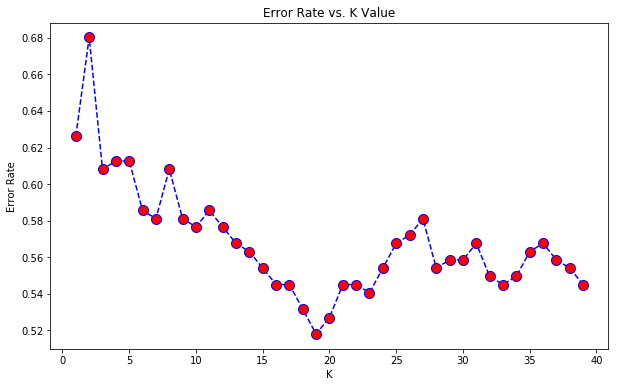

In [41]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Building the KNN model with K = 19

In [53]:
knn = KNeighborsClassifier(n_neighbors=19)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=19')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=19


[[12  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0 10  8  2  1  0  0  8  0  0  0  0  0  0  0]
 [ 0  5 22 10  2  0  0  7  0  0  0  0  0  0  0]
 [ 0  4  8 11  2  0  0  5  0  0  0  0  0  0  0]
 [ 0  2  7  2  4  0  0  4  0  0  0  0  0  0  0]
 [ 0  0  3  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  1  0  0  4  0  0  0  0  0  0  0]
 [ 0  1  5  5  1  0  0 48  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]]


             precision    recall  f1-score   support

          0       0.86      0.92      0.89        13
          1       0.45      0.34      0.39        29
          2       0.38      0.48      0.42        46
          3       0.37      0.37      0.37        30

precision of 0.42 obtained with K =19, Where there is no big improvement

Now Building Decision Tree Model 

In [44]:
dtree = DecisionTreeClassifier()

In [45]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
predictions = dtree.predict(X_test)

Evaluating the model

In [50]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.79      0.85      0.81        13
          1       0.36      0.34      0.35        29
          2       0.42      0.35      0.38        46
          3       0.31      0.37      0.33        30
          4       0.21      0.21      0.21        19
          5       0.00      0.00      0.00         4
          6       0.00      0.00      0.00         7
          8       0.58      0.58      0.58        60
         16       0.00      0.00      0.00         4
         24       0.00      0.00      0.00         3
         32       0.00      0.00      0.00         1
         40       0.00      0.00      0.00         2
         56       0.00      0.00      0.00         1
         64       0.00      0.00      0.00         2
         80       0.00      0.00      0.00         0
        112       0.00      0.00      0.00         0
        120       0.00      0.00      0.00         1

avg / total       0.40      0.39      0.39  

No Big Improvement over KNN in Decision Tree

Building Model with Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=250)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [55]:
rfc_pred = rfc.predict(X_test)

Evaluating the RF Model

In [56]:
print(confusion_matrix(y_test,rfc_pred))

[[13  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9  7  5  1  0  0  6  1  0  0  0  0  0  0]
 [ 0  7 19  8  6  0  0  5  1  0  0  0  0  0  0]
 [ 0  3  9 11  3  0  0  3  0  1  0  0  0  0  0]
 [ 0  1  5  3  6  0  0  4  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  0  2  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  3  0  0  1  0  0  0  0]
 [ 0  3  1  2  2  0  0 52  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]]


In [57]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       0.38      0.31      0.34        29
          2       0.46      0.41      0.44        46
          3       0.38      0.37      0.37        30
          4       0.32      0.32      0.32        19
          5       1.00      0.25      0.40         4
          6       0.00      0.00      0.00         7
          8       0.60      0.87      0.71        60
         16       0.00      0.00      0.00         4
         24       0.00      0.00      0.00         3
         32       0.00      0.00      0.00         1
         40       0.00      0.00      0.00         2
         56       0.00      0.00      0.00         1
         64       0.00      0.00      0.00         2
        120       0.00      0.00      0.00         1

avg / total       0.45      0.50      0.46       222



Some Improvement in Random Forest over Decision Tree in terms of Accuracy

Building A clustering Model using K_Means Clusttering 

In [58]:
kmeans = KMeans(n_clusters=5)

In [59]:
kmeans.fit(meadata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [60]:
kmeans.cluster_centers_

array([[ 1.92666667e+01,  1.56000000e+01,  4.30000000e+00,
         3.71666667e+00,  2.60000000e+00,  2.27200000e+02,
         2.96166667e+01,  1.31666667e+01,  3.63149706e+01,
         3.61306617e+05,  9.39833333e+01,  6.66666667e-02,
         1.16666667e+00,  2.60736718e+01,  9.31666667e+00],
       [ 1.42467532e+01,  2.19480519e+01,  5.40259740e+00,
         3.72727273e+00,  1.57142857e+00,  2.30610850e+02,
         3.41688312e+01,  1.29090909e+01,  3.72337662e+01,
         2.19858610e+05,  9.52727273e+01, -4.16333634e-17,
         1.22077922e+00,  2.75680032e+01,  9.07792208e+00],
       [ 1.90080321e+01,  1.80481928e+01,  8.28112450e+00,
         4.00000000e+00,  2.85943775e+00,  2.25658635e+02,
         2.88192771e+01,  1.18175334e+01,  3.60981892e+01,
         2.71270958e+05,  9.40264546e+01,  7.29293195e-02,
         1.32202234e+00,  2.66429894e+01,  6.71887550e+00],
       [ 1.75170940e+01,  2.00144325e+01,  6.11247586e+00,
         3.88461538e+00,  2.57692308e+00,  2.15146209

In [299]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

However we must understand that clustering algorithms are used to gain more insight about the data and find
structure/patterns within the datapoints if there is any.

Clustering methods are not used for prediction or classification purposes and hence there is no meaning in evaluating
the performance of such models in tasks such as prediction of hours of absenteeism.
Even if we were to come up with a way to evaluate the models, their accuracies would be much greater than the accuracy of
any other classification algorithm as there is a significant decrease in the number of classes while clustering.